# **Data Loading and EDA**

## **I. Import Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

## **II. Data Loading**

### Load Datasets

In [49]:
# Load features dataset
features = pd.read_csv("data_raw/Features data set.csv")

# Load sales information dataset
sales = pd.read_csv("data_raw/sales data-set.csv")

# Load stores informtaion dataset
stores = pd.read_csv("data_raw/stores data-set.csv")

### Check Columns Information for Each Dataset

In [50]:
print("========= FEATURES INFO =========\n")
features.info()
print(f"\n{features.head()}")

========= FEATURES INFO =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       

In [51]:
print("========= SALES INFO =========\n")
sales.info()
print(f"\n{sales.head()}")

========= SALES INFO =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


In [52]:
print("========= STORES INFO =========\n")
stores.info()
print(f"\n{stores.head()}")

========= STORES INFO =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


### Merge Datasets

#### `features` Dataset and `sales` Dataset

Key : Store & Date

In [53]:
# Merge
retail_df = sales.merge(
    features,
    on=["Store", "Date"],
    how="left"
)


print(f"Shape: \n{retail_df.shape}")
print(f"\nColumns list \n{retail_df.columns.to_list()}")

Shape: 
(421570, 15)

Columns list 
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']


#### Merged dataset with `stores` Dataset

Key : Date

In [54]:
# Merge
retail_df = retail_df.merge(
    stores,
    on="Store",
    how="left"
)


print(f"Shape: \n{retail_df.shape}")
print(f"\nColumns list \n{retail_df.columns.to_list()}")

Shape: 
(421570, 17)

Columns list 
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size']


## **III. Data Cleaning**

### Check Dataset

In [55]:
# Preview
retail_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [56]:
# Check general information
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [57]:
# Check missing value percentage
misval_m1 = (retail_df["MarkDown1"].isnull().sum()) / len(retail_df) * 100
misval_m2 = (retail_df["MarkDown2"].isnull().sum()) / len(retail_df) * 100
misval_m3 = (retail_df["MarkDown3"].isnull().sum()) / len(retail_df) * 100
misval_m4 = (retail_df["MarkDown4"].isnull().sum()) / len(retail_df) * 100
misval_m5 = (retail_df["MarkDown5"].isnull().sum()) / len(retail_df) * 100

print(f"Missing value of Markdown 1 column: {misval_m1:.2f} %")
print(f"Missing value of Markdown 2 column: {misval_m2:.2f} %")
print(f"Missing value of Markdown 3 column: {misval_m3:.2f} %")
print(f"Missing value of Markdown 4 column: {misval_m4:.2f} %")
print(f"Missing value of Markdown 5 column: {misval_m5:.2f} %")


Missing value of Markdown 1 column: 64.26 %
Missing value of Markdown 2 column: 73.61 %
Missing value of Markdown 3 column: 67.48 %
Missing value of Markdown 4 column: 67.98 %
Missing value of Markdown 5 column: 64.08 %


Kolom markdown1 hingga Markdown5 menunjukkan adanya missing value dalam jumlah yang besar, yakni 64.08% hingga 73.61%. Namun hal ini sama sekali tidak mengindikasikan adanya kesalahan pada dataset. Hal ini dikarenakan Markdown adalah kolom yang menginformasikan adanya diskon di periode waktu tertentu sesuai dengan tanggal yang tertera di dataset. Sebagaimana bisnis retail pada umumnya, event diskon besar tidak dilaksanakan setiap hari sepanjang tahun, melainkan hanya dilaksanakan pada hari-hari atau tanggal-tanggal tertentu saja, seperti pada periode tahun ajaran baru, periode halloween, periode liburan natal dan tahun baru, dan sebagainya. Maka dari itu, karena markdown menunjukkan hal penting dalam pola penjualan, kita tidak akan mengabaikan kolom Markdown, dan akan melakukan imputasi dengan angka 0 untuk setiap missing value, sehingga nantinya sistem pemodelan bisa menangkap pola ini dengan baik.

### Cast Data Type of `Date` Column into Datetime Type

Because the Date column is still an object type, we have to change it to datetime format.

In [58]:
# Cats data type
retail_df["Date"] = pd.to_datetime(retail_df["Date"], format="%d/%m/%Y")

# QUcik check
retail_df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
421570 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB


### Columns Similarity

#### Check Similarity

Due to the presence of 2 suspicious columns in the final dataset, namely the 'IsHoliday_x' column and the 'IsHoliday_y' column, we will check the similarity between these two columns.

In [59]:
# Check similarity
((retail_df["IsHoliday_x"] == retail_df["IsHoliday_y"]).value_counts()) == len(retail_df)

True    True
Name: count, dtype: bool

#### Handling Similarity

Since the IsHoliday_x and IsHoliday_y columns have identical values, we can use only one of them and delete the other.

In [60]:
# Keep a column, drop another
retail_df.drop(columns="IsHoliday_x", inplace=True)

# Rename the kept column
retail_df.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)

In [61]:
# Quick check
for i,col in enumerate(retail_df.columns.tolist()):
    print(f"{i}. {col}")

0. Store
1. Dept
2. Date
3. Weekly_Sales
4. Temperature
5. Fuel_Price
6. MarkDown1
7. MarkDown2
8. MarkDown3
9. MarkDown4
10. MarkDown5
11. CPI
12. Unemployment
13. IsHoliday
14. Type
15. Size


### Check Duplicates

In [62]:
retail_df.duplicated().sum()

0

### Check Time Continuity and Weekly Interval validation

Before performing any exploratory analysis or modeling, we need to ensure that the data is properly ordered in time and follows a consistent weekly interval.

Demand forecasting relies heavily on temporal patterns. If the time sequence is not correctly ordered or contains irregular gaps, the model may misinterpret demand fluctuations and seasonality.

In this step, we sort the data by Store, Department, and Date, then validate whether the majority of observations follow a consistent 7-day (weekly) interval.

#### Sort Data

In [63]:
# Sort to enforce time order
retail_df = retail_df.sort_values(["Store", "Dept", "Date"]).reset_index(drop=True)

# Quick sanity
retail_df[["Store", "Dept", "Date"]].head()

,Store,Dept,Date
0,1,1,2010-02-05
1,1,1,2010-02-12
2,1,1,2010-02-19
3,1,1,2010-02-26
4,1,1,2010-03-05


#### Check the Consistence of Weekly Interval

In [64]:
# Check date gaps per Store-Dept
date_gaps = (
    retail_df.groupby(["Store", "Dept"])["Date"]
    .diff()
    .dt.days
)

gap_counts = date_gaps.value_counts(dropna=True).sort_index()
gap_counts.head(20), gap_counts.tail(20)

(Date
 7.0      412792
 14.0       2346
 21.0        862
 28.0        517
 35.0        338
 42.0        214
 49.0        150
 56.0        145
 63.0        117
 70.0        101
 77.0         72
 84.0         57
 91.0         49
 98.0         39
 105.0        35
 112.0        28
 119.0        34
 126.0        20
 133.0        24
 140.0        19
 Name: count, dtype: int64,
 Date
 448.0    3
 455.0    1
 462.0    6
 476.0    1
 490.0    3
 511.0    1
 518.0    3
 532.0    3
 539.0    1
 546.0    1
 553.0    2
 574.0    3
 609.0    1
 630.0    1
 644.0    2
 658.0    1
 672.0    1
 707.0    1
 791.0    1
 882.0    1
 Name: count, dtype: int64)

#### Check Store-Dept with Abnormal Gap of Interval

In [65]:
# Identify groups with abnormal gaps (not 7 days)
abnormal = retail_df.assign(gap_days=date_gaps).query("gap_days.notna() and gap_days != 7")

abnormal_groups = (
    abnormal.groupby(["Store", "Dept"])["gap_days"]
    .apply(lambda s: s.value_counts().to_dict())
    .sort_values(ascending=False)
)

abnormal_groups.head(10)

Store  Dept      
41     45    14.0    22.0
9      54    14.0    21.0
16     45    14.0    21.0
12     45    14.0    20.0
25     58    14.0    20.0
5      45    14.0    19.0
13     45    14.0    19.0
28     45    14.0    18.0
7      45    14.0    18.0
32     45    14.0    18.0
Name: gap_days, dtype: float64

**Analysis of Weekly Interval Consistency**

---

Based on the interval analysis, the dataset is largely consistent with a weekly time structure. The vast majority of observations show a 7-day gap between consecutive dates, confirming that the data is recorded at a weekly frequency and is structurally suitable for demand forecasting.

A smaller number of observations exhibit longer gaps such as 14, 21, or 28 days, indicating missing weeks for certain Store–Department combinations. In a large-scale retail environment, this behavior is not uncommon and may reflect operational realities such as temporary store closures, inactive departments, delayed reporting, or departments that were introduced later in the timeline.

Very large gaps (exceeding several months) appear only in a limited number of cases and do not dominate the overall data distribution. This suggests that such gaps are isolated rather than systemic issues affecting the dataset as a whole.

Overall, the temporal structure of the data is sufficiently stable to support time-series analysis and forecasting. The presence of irregular gaps will be treated as contextual information rather than immediate data errors, and will be taken into account in later stages such as feature engineering, model design, and decision logic—particularly when handling inventory decisions for Store–Department pairs with shorter or incomplete sales histories.

### Check Key Uniequeness



Our dataset is expected to be at the Store × Department × Week level, meaning each (Store, Dept, Date) combination should appear only once. This check helps confirm that the merge process didn’t accidentally duplicate rows. Duplicate keys can silently inflate Weekly_Sales and distort patterns, which would mislead both analysis and forecasting models.

In [66]:
# Validate grain: each Store, Deptm and Date should appear once
key_cols = ["Store", "Dept", "Date"]
dup_key_rows = retail_df.duplicated(subset=key_cols).sum()

print("Duplicated key rows:", dup_key_rows)

Duplicated key rows: 0


**Analysis of Key Uniqueness**

---

A result of 0 duplicate keys confirms the dataset has a clean grain: each (Store, Dept, Date) appears only once. This strongly suggests the merge did not create unintended row duplication, so Weekly_Sales is not artificially inflated by duplicated records. With this confirmed, we can safely proceed to EDA and time-based feature engineering (lag, rolling windows) without worrying about duplicated-key bias.

### Target Sanity Check

In [67]:
# Negative value check
neg_sales = (retail_df["Weekly_Sales"] < 0).sum()

# Zero value check
zero_zales = (retail_df["Weekly_Sales"] == 0).sum()

print("Negative weekly sales count:", neg_sales)
print("Zero weekly sales count:", zero_zales)

Negative weekly sales count: 1285
Zero weekly sales count: 73


The presence of negative and zero weekly sales values indicates that the dataset captures real operational behavior commonly found in large-scale retail systems.

Negative sales are likely related to returns, post-period corrections, or accounting adjustments, while zero sales may reflect inactive departments or temporary store conditions.

At this stage, these values are intentionally preserved to avoid introducing premature assumptions. Decisions on how to treat them will be made later during feature engineering and modeling, based on forecasting objectives and inventory decision logic.

### Outliers Quick Check

Before diving deeper into EDA, we quickly inspect the highest and lowest Weekly_Sales values. This helps us validate whether extreme values are plausible (e.g., holiday spikes, major promotions, returns/adjustments), and sets expectations for later steps such as log-scaling, robust metrics, or outlier-aware modeling.

In [68]:
retail_df.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'Type',
 'Size']

In [69]:
display(retail_df.nlargest(10, "Weekly_Sales")[["Store", "Dept", "Date", "Weekly_Sales", "IsHoliday"]])
display(retail_df.nsmallest(10, "Weekly_Sales")[["Store", "Dept", "Date", "Weekly_Sales", "IsHoliday"]])


,Store,Dept,Date,Weekly_Sales,IsHoliday
95373,10,72,2010-11-26,693099.36,True
338013,35,72,2011-11-25,649770.18,True
95425,10,72,2011-11-25,630999.19,True
337961,35,72,2010-11-26,627962.93,True
135665,14,72,2010-11-26,474330.10,True
195088,20,72,2010-11-26,422306.25,True
264390,27,72,2010-11-26,420586.57,True
88428,10,7,2010-12-24,406988.63,False
95377,10,72,2010-12-24,404245.03,False
214432,22,72,2010-11-26,393705.20,True


,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,2010-10-08,-4988.94,False
336495,35,47,2011-09-02,-3924.00,False
417801,45,47,2010-02-26,-1750.00,False
153916,16,47,2012-03-09,-1699.00,False
271300,28,32,2011-03-25,-1321.48,False
16291,2,47,2010-07-30,-1098.00,False
16295,2,47,2010-10-15,-1098.00,False
16297,2,47,2010-11-19,-1098.00,False
24830,3,32,2011-09-30,-1008.96,False
35561,4,47,2010-09-17,-898.00,False


**Analysis of Outliers**

---

The top-sales records align strongly with holiday-driven spikes: many of the highest Weekly_Sales values occur on late-November dates and are flagged as IsHoliday = True, which is consistent with major retail events where demand surges sharply. This pattern supports the idea that extreme positive values are not random noise but expected seasonal peaks.

On the lower end, the most negative values appear outside holiday weeks and remain relatively small in magnitude compared to the positive peaks. This supports the interpretation that negative sales likely reflect returns or accounting corrections rather than structural data errors.

At this stage, these extremes should be preserved. They provide useful signals about seasonality and operational adjustments, and they will inform later choices such as robust evaluation metrics, log/Box-Cox style transformations (if needed), and decision logic that avoids overreacting to one-off spikes.

### Business Schema Declaration

Before running deeper EDA, we define the business schema (grain, target, time key, and key drivers) and verify that the merged dataset contains all required columns. We also summarize basic coverage—row count, number of stores and departments, and the available date range—to ensure the dataset matches the intended forecasting and inventory decision use case.

- Grain: Weekly sales at Store × Department × Week level
- Target: Weekly_Sales
- Time Key: Date (weekly frequency)
- Demand Drivers: temperature, fuel price, CPI, unemployment, markdown/promo indicators, and holiday flag
- Downstream Decision: inventory replenishment (safety stock, reorder point, and order recommendation)

In [70]:
# Final check before EDA

required_cols = [
    "Store","Dept","Date","Weekly_Sales",
    "IsHoliday","Temperature","Fuel_Price","CPI","Unemployment",
    "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5",
    "Type","Size"
]

missing_required = [c for c in required_cols if c not in retail_df.columns]

print("Missing required columns:", missing_required)
print("Total rows:", len(retail_df), "| Unique Store:", retail_df["Store"].nunique(), "| Unique Dept:", retail_df["Dept"].nunique())
print("Date range:", retail_df["Date"].min(), "→", retail_df["Date"].max())


Missing required columns: []
Total rows: 421570 | Unique Store: 45 | Unique Dept: 81
Date range: 2010-02-05 00:00:00 → 2012-10-26 00:00:00


All required fields are present, which indicates the merge produced a complete feature set for the intended forecasting use case. The dataset scale is strong: over 421K weekly records across 45 stores and 81 departments, which supports both cross-sectional learning (differences between stores/departments) and time-series patterns.

The available date range spans roughly 2.5+ years. That is generally sufficient for weekly forecasting, especially to capture seasonality effects such as holiday spikes. One operational note is that the end date is in late 2012, so later evaluation should use time-based splits and avoid leakage. Also, because the grain is Store × Dept × Week, the next EDA step should validate coverage consistency per group (e.g., whether every Store–Dept has a continuous weekly timeline or has gaps).

## **IV. Exploratory Data Analysis**

### 4.1 Dataset Overview and Sanity Check

In [71]:
# Check shape
retail_df.shape

(421570, 16)

In [72]:
# Check date range
min_date = retail_df["Date"].min()
max_date = retail_df["Date"].max()
print(f"Date range: {min_date} → {max_date}")

Date range: 2010-02-05 00:00:00 → 2012-10-26 00:00:00


In [73]:
# Check number of Stores and Departments
n_store = retail_df["Store"].nunique()
n_dept = retail_df["Dept"].nunique()
print(f"Number of Stores        : {n_store}")
print(f"Number of Departments   : {n_dept}")

Number of Stores        : 45
Number of Departments   : 81


In [74]:
# Validate grain uniqueness (Store, Dept, Date should appear once)
key_cols = ["Store", "Dept", "Date"]
dup_key_rows = retail_df.duplicated(subset=key_cols).sum()
print("Duplicated key rows:", dup_key_rows)

Duplicated key rows: 0


In [75]:
# Weekly frequency sanity check (date gaps within each Store-Dept)
date_gaps = (
    retail_df.sort_values(key_cols)
             .groupby(["Store", "Dept"])["Date"]
             .diff()
             .dt.days
)

gap_counts = date_gaps.value_counts(dropna=True).sort_index()
print("\n=== WEEKLY GAP DISTRIBUTION (days) ===")
print(gap_counts.head(15))

print("\nLargest gaps (tail):")
print(gap_counts.tail(15))


=== WEEKLY GAP DISTRIBUTION (days) ===
Date
7.0      412792
14.0       2346
21.0        862
28.0        517
35.0        338
42.0        214
49.0        150
56.0        145
63.0        117
70.0        101
77.0         72
84.0         57
91.0         49
98.0         39
105.0        35
Name: count, dtype: int64

Largest gaps (tail):
Date
511.0    1
518.0    3
532.0    3
539.0    1
546.0    1
553.0    2
574.0    3
609.0    1
630.0    1
644.0    2
658.0    1
672.0    1
707.0    1
791.0    1
882.0    1
Name: count, dtype: int64


### 4.2 Target Variable Profiling

In this section, we profile the target variable (Weekly_Sales) to understand its scale, distribution shape, and extreme values. This helps us anticipate skewness/heavy tails and choose metrics and modeling strategies that behave well under such distributions (e.g., MAE vs RMSE, potential transformations, and robust baselines).

#### Distribution and Scale

In [76]:
# Statistical summary
summary = retail_df["Weekly_Sales"].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75,0.95, 0.99]).to_frame("value")
summary.loc["skewness"] = retail_df["Weekly_Sales"].skew()
summary.loc["kurtosis"] = retail_df["Weekly_Sales"].kurtosis()

summary

,value
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
1%,5.000000
5%,59.974500
25%,2079.650000
50%,7612.030000
75%,20205.852500
95%,61201.951000


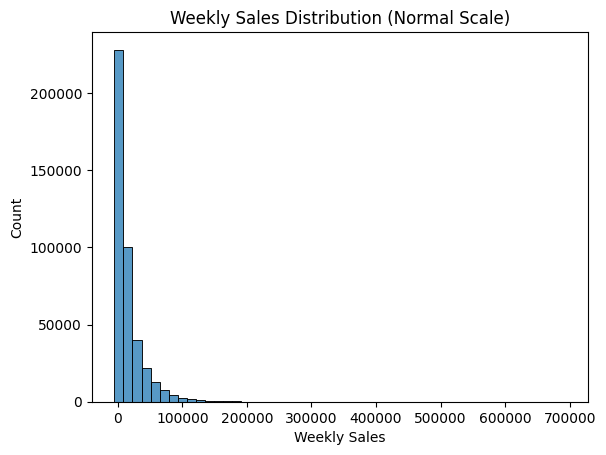

In [77]:
# Visualization of normal scale

plt.figure()
sns.histplot(x=retail_df["Weekly_Sales"], bins=50)
plt.title("Weekly Sales Distribution (Normal Scale)")
plt.xlabel("Weekly Sales")
plt.ylabel("Count")
plt.show()

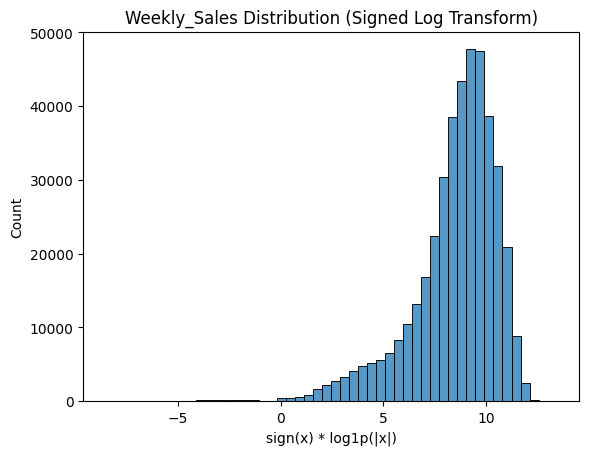

In [78]:
# VIsualization of log scale

x = retail_df["Weekly_Sales"].dropna()

signed_log = np.sign(x) * np.log1p(np.abs(x))

plt.figure()
sns.histplot(signed_log, bins=50)
plt.title("Weekly_Sales Distribution (Signed Log Transform)")
plt.xlabel("sign(x) * log1p(|x|)")
plt.ylabel("Count")
plt.show()

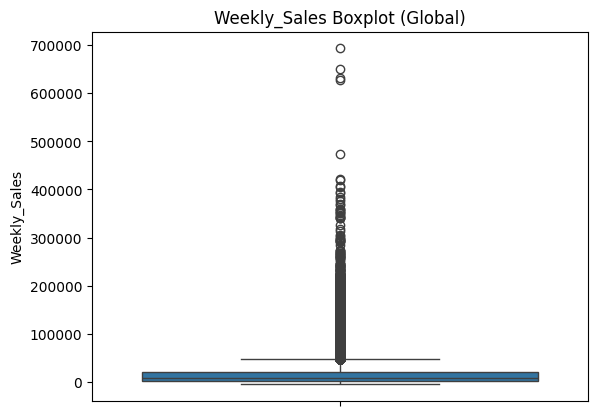

In [79]:
# Visualization of outliers
plt.figure()
sns.boxplot(x, vert=True, showfliers=True)
plt.title("Weekly_Sales Boxplot (Global)")
plt.ylabel("Weekly_Sales")
plt.show()

#### Negative and Zero Sales

Here we quantify how often Weekly_Sales is zero or negative, and where it tends to occur (by store/department/time/holiday). Negative sales often represent returns, accounting adjustments, or corrections rather than true “negative demand”, so we treat it carefully before modeling decision logic.

In [80]:
# Count and percentage
x = retail_df["Weekly_Sales"]

n_total = x.shape[0]
n_neg = (x < 0).sum()
n_zero = (x == 0).sum()

neg_pct = n_neg / n_total * 100
zero_pct = n_zero / n_total * 100

pd.DataFrame({
    "count": [n_neg, n_zero],
    "pct (%)": [neg_pct, zero_pct]
}, index=["negative", "zero"])

,count,pct (%)
negative,1285,0.304813
zero,73,0.017316


In [81]:
# Breakdown by holiday
breakdown_holiday = (
    retail_df.assign(
        negative_rate = retail_df["Weekly_Sales"] < 0,
        zero_rate = retail_df["Weekly_Sales"] == 0
    )
    .groupby("IsHoliday")[["negative_rate", "zero_rate"]]
    .mean()
)

breakdown_holiday

,negative_rate,zero_rate
IsHoliday,,
False,0.003029,0.000179
True,0.003304,0.000101


Negative sales occur at a very low rate overall (≈0.3%) and show no meaningful difference between holiday and non-holiday weeks. This suggests that negative values are more likely driven by operational or accounting adjustments (e.g., returns or corrections) rather than holiday-specific demand behavior.

### 4.3 Time Series Behavior

In this section, we look at the overall time series pattern by aggregating Weekly_Sales across all stores and departments. This helps us understand the macro trend, major seasonal spikes, and whether the series is structurally stable over time. The result will guide feature design (lags/rolling windows) and time-aware validation later.

#### Aggregate Demand Over Time

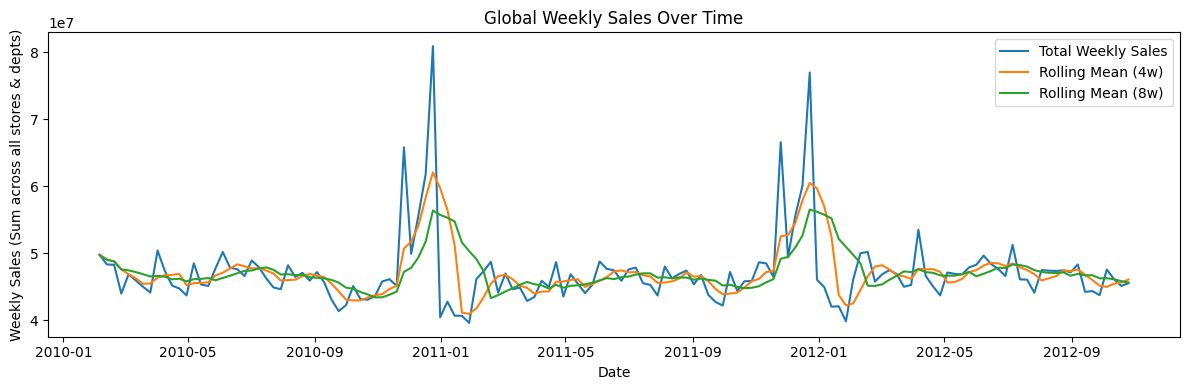

In [82]:
# Aggregate total sales per week
global_ts = (
    retail_df.groupby("Date", as_index=False)["Weekly_Sales"]
    .sum()
    .sort_values("Date")
)

# Add rolling means (4 weeks and 8 weeks)
global_ts["roll_4w"] = global_ts["Weekly_Sales"].rolling(window=4, min_periods=1).mean()
global_ts["roll_8w"] = global_ts["Weekly_Sales"].rolling(window=8, min_periods=1).mean()

# Visualization
plt.figure(figsize=(12, 4))
plt.plot(global_ts["Date"], global_ts["Weekly_Sales"], label="Total Weekly Sales")
plt.plot(global_ts["Date"], global_ts["roll_4w"], label="Rolling Mean (4w)")
plt.plot(global_ts["Date"], global_ts["roll_8w"], label="Rolling Mean (8w)")
plt.title("Global Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales (Sum across all stores & depts)")
plt.legend()
plt.tight_layout()
plt.show()

Global weekly demand shows a stable baseline with strong and recurring year-end seasonal spikes. The absence of long-term trend shifts suggests a structurally stable series, while the pronounced holiday-driven peaks highlight the importance of seasonality-aware features and evaluation metrics.

#### Seasonality Check

In [83]:
# Feature time columns
ts_tmp = retail_df.copy()

ts_tmp["year"] = ts_tmp["Date"].dt.year
ts_tmp["month"] = ts_tmp["Date"].dt.month
ts_tmp["weekofyear"] = ts_tmp["Date"].dt.isocalendar().week.astype(int)


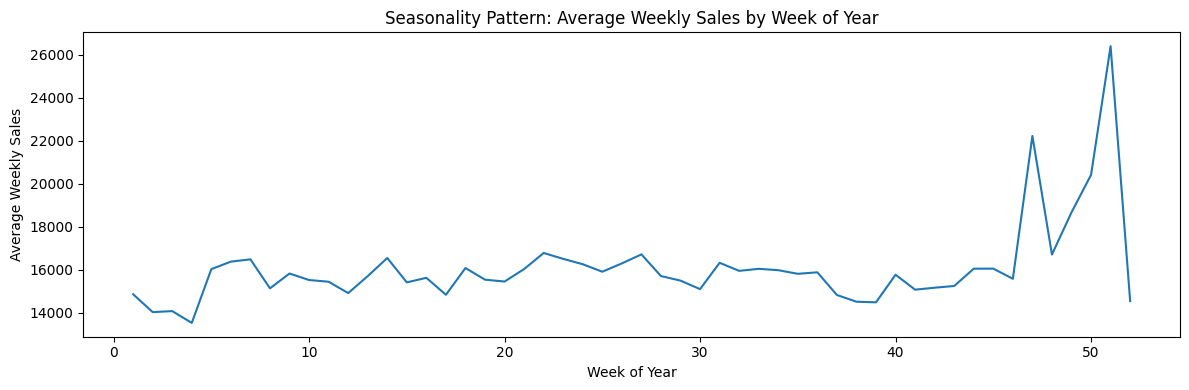

In [84]:
# Average sales by week of year
season_woy = (
    ts_tmp.groupby("weekofyear", as_index=False)["Weekly_Sales"]
    .mean()
    .sort_values("weekofyear")
)

# Visualization
plt.figure(figsize=(12, 4))
plt.plot(season_woy["weekofyear"], season_woy["Weekly_Sales"])
plt.title("Seasonality Pattern: Average Weekly Sales by Week of Year")
plt.xlabel("Week of Year")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()

The weekly sales pattern shows a strong and recurring annual seasonality, with pronounced demand spikes toward the end of the year. Outside these peak weeks, demand remains relatively stable. This confirms that calendar-driven effects play a critical role and justifies the use of seasonal features such as week-of-year indicators and annual lags.

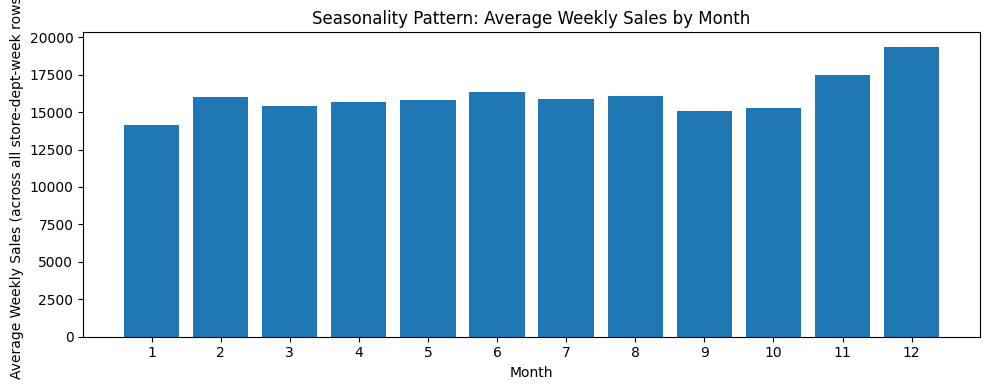

In [85]:
# Average sales by month
season_month = (
    ts_tmp.groupby("month", as_index=False)["Weekly_Sales"]
    .mean()
    .sort_values("month")
)

# Visualization
plt.figure(figsize=(10, 4))
plt.bar(season_month["month"], season_month["Weekly_Sales"])
plt.title("Seasonality Pattern: Average Weekly Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales (across all store-dept-week rows)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

Monthly aggregation confirms a strong year-end seasonal effect, with December consistently showing the highest average weekly sales. Outside the holiday period, demand remains relatively stable across months, indicating a strong baseline demand with seasonal amplification rather than structural volatility.

### 4.4 Holiday and Promotion Effect Analysis

In this section, we quantify the impact of holidays and promotions/markdowns on Weekly_Sales. We compare sales distributions between holiday vs non-holiday weeks and measure the uplift. Then we analyze promo intensity using markdown features to validate whether “missing markdown means no promo” and whether promo activity is associated with meaningful sales changes. This helps us confirm key demand drivers and informs feature engineering and business decisions (inventory planning, reorder policy, and seasonal uplift handling).

#### Holiday vs Non-Holiday

In [86]:
# Basic comparison table: holiday vs non-holiday
holiday_summary = (
    retail_df.groupby("IsHoliday")["Weekly_Sales"]
    .agg(
        count="count",
        mean="mean",
        median="median",
        std="std",
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
    )
)

holiday_summary["mean_uplift_vs_nonholiday"] = (
    holiday_summary["mean"] / holiday_summary.loc[False, "mean"] - 1
)
holiday_summary["median_uplift_vs_nonholiday"] = (
    holiday_summary["median"] / holiday_summary.loc[False, "median"] - 1
)

holiday_summary

,count,mean,median,std,q25,q75,mean_uplift_vs_nonholiday,median_uplift_vs_nonholiday
IsHoliday,,,,,,,,
False,391909,15901.445069,7589.95,22330.747450,2079.75,20131.21,0.000000,0.00000
True,29661,17035.823187,7947.74,27222.000409,2078.54,21189.25,0.071338,0.04714


**Inisght of holiday vs non-holiday sales**

Holiday weeks show a consistent uplift in Weekly_Sales, with a ~7% increase in mean and ~5% in median compared to non-holiday weeks. The larger gap between mean and median suggests that while most stores experience modest gains, a small subset of store-department combinations see substantial spikes during holidays. Importantly, the lower quartile remains almost unchanged, indicating that holidays do not uniformly lift low-performing stores. This confirms holidays as a structural but heterogeneous demand driver.

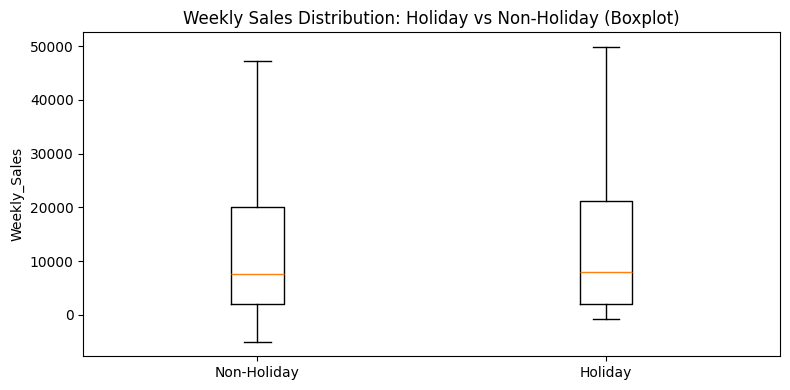

In [87]:
# Boxplot: Weekly_Sales by holiday flag
data_non = retail_df.loc[retail_df["IsHoliday"] == False, "Weekly_Sales"]
data_hol = retail_df.loc[retail_df["IsHoliday"] == True, "Weekly_Sales"]

plt.figure(figsize=(8, 4))
plt.boxplot([data_non, data_hol], labels=["Non-Holiday", "Holiday"], showfliers=False)
plt.title("Weekly Sales Distribution: Holiday vs Non-Holiday (Boxplot)")
plt.ylabel("Weekly_Sales")
plt.tight_layout()
plt.show()


**Inisght of Boxplots**

The boxplot confirms the numerical findings: holiday weeks exhibit a slightly higher median Weekly Sales and a noticeably wider interquartile range. This indicates that while most store-department combinations experience modest gains, demand variability increases during holidays, with a small subset showing pronounced spikes. The lower tail remains comparable to non-holiday weeks, suggesting that holidays do not uniformly lift low-performing segments.

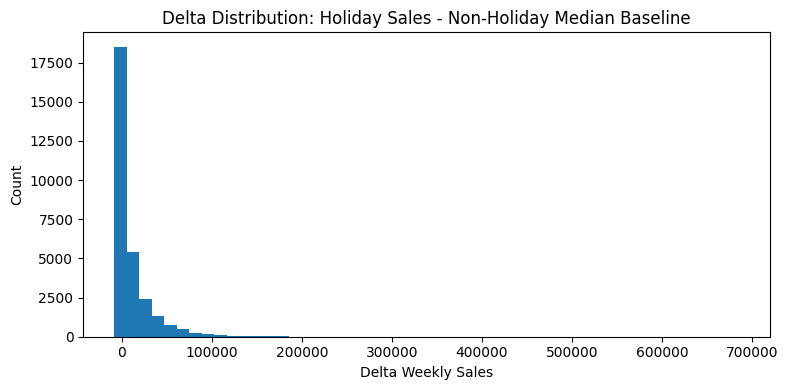

7589.95

In [88]:
# Delta distribution (Holiday - Non-Holiday baseline) at global level
# We create a simple "delta vs non-holiday median" to visualize how far holiday weeks deviate.
baseline = data_non.median()
delta = retail_df.loc[retail_df["IsHoliday"] == True, "Weekly_Sales"] - baseline

plt.figure(figsize=(8, 4))
plt.hist(delta, bins=50)
plt.title("Delta Distribution: Holiday Sales - Non-Holiday Median Baseline")
plt.xlabel("Delta Weekly Sales")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

baseline


**Insight of Delta Distribution**

The delta distribution shows that most holiday weeks generate higher sales compared to a non-holiday baseline, confirming the presence of a positive holiday uplift. However, the effect is highly skewed: while many holidays produce moderate gains, a small subset drives extremely large sales spikes. This indicates that holiday impact is heterogeneous rather than uniform. As a result, holiday should be treated as an important but non-deterministic feature in modeling, and evaluation metrics should be chosen carefully due to the presence of heavy tails.

#### Markdown Effect (Promo Intensity)

In [89]:
# Build markdown features
md_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

# Make sure only numerical
retail_df[md_cols] = retail_df[md_cols].apply(pd.to_numeric, errors="coerce")

tmp = retail_df.copy()
tmp["markdown_total"] = tmp[md_cols].fillna(0).sum(axis=1)
tmp["markdown_active_count"] = (tmp[md_cols].fillna(0) > 0).sum(axis=1)
tmp["markdown_active_flag"] = (tmp["markdown_total"] > 0)

tmp[["markdown_total", "markdown_active_count", "markdown_active_flag"]].head()


,markdown_total,markdown_active_count,markdown_active_flag
0,0.0,0,False
1,0.0,0,False
2,0.0,0,False
3,0.0,0,False
4,0.0,0,False


**Inisght of Markdown Intensity**

The constructed markdown features clearly separate promo presence, promo breadth, and promo intensity, which is critical for understanding how discounts influence demand.

Most rows show markdown_total = 0 and markdown_active_count = 0, confirming that no-markdown weeks are the dominant baseline state. This validates the earlier assumption that missing markdown values can be safely interpreted as no promotion, rather than data quality issues.

In [90]:
# Sales distribution when promo active vs not active
promo_summary = (
    tmp.groupby("markdown_active_flag")["Weekly_Sales"]
    .agg(count="count", mean="mean", median="median", std="std")
)

promo_summary["mean_uplift_vs_no_promo"] = (
    promo_summary["mean"] / promo_summary.loc[False, "mean"] - 1
)
promo_summary["median_uplift_vs_no_promo"] = (
    promo_summary["median"] / promo_summary.loc[False, "median"] - 1
)

promo_summary


,count,mean,median,std,mean_uplift_vs_no_promo,median_uplift_vs_no_promo
markdown_active_flag,,,,,,
False,270138,15871.522017,7654.845,22411.830633,0.000000,0.000000
True,151432,16177.015244,7537.870,23234.409534,0.019248,-0.015281


**Inisght of promotional Effect toward Sales**

At a global level, weeks with active markdown show a slightly higher average weekly sales compared to no-promo weeks, with a mean uplift of ~1.9%. However, this uplift does not carry over to the median, which is actually ~1.5% lower during promo weeks.

This divergence between mean and median tells an important story:
- Promotions do create upside, but the uplift is driven by a relatively small number of high-performing weeks.
- For the majority of store–department–week observations, promotions do not reliably lift typical demand.

The higher standard deviation during promo weeks further reinforces this: promotions increase volatility rather than consistently shifting the entire demand distribution upward.

From a business standpoint, this suggests that promotions are situational amplifiers, not universal demand boosters. Their effectiveness likely depends on contextual factors such as product category, timing, store characteristics, or overlap with holidays.

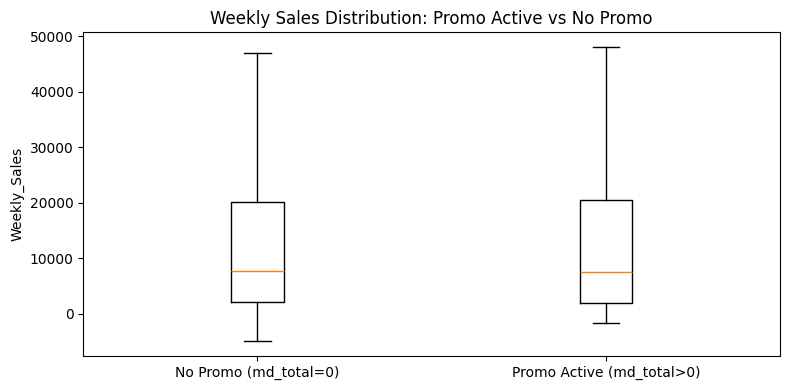

In [91]:
# Boxplot: Weekly_Sales by promo active flag (markdown_total > 0)
sales_no_promo = tmp.loc[tmp["markdown_active_flag"] == False, "Weekly_Sales"]
sales_promo = tmp.loc[tmp["markdown_active_flag"] == True, "Weekly_Sales"]

plt.figure(figsize=(8, 4))
plt.boxplot([sales_no_promo, sales_promo], labels=["No Promo (md_total=0)", "Promo Active (md_total>0)"], showfliers=False)
plt.title("Weekly Sales Distribution: Promo Active vs No Promo")
plt.ylabel("Weekly_Sales")
plt.tight_layout()
plt.show()


**Inisght of Promo Active vs No Promo**

1. Promotions slightly lift average sales, but not the typical (median) outcome. The median weekly sales during promo weeks are very close to non-promo weeks. This indicates that for a “typical” store-department-week, promotions do not dramatically shift baseline demand.

2. Promo impact is driven by the upper tail, not the center. The promo boxplot shows a wider upper range and higher extreme values, suggesting promotions are effective mainly in high-response scenarios (certain stores, departments, or peak weeks), rather than consistently across all units.

3. Sales volatility increases during promotions. The interquartile range and whiskers are slightly wider for promo weeks, implying higher uncertainty. Promotions introduce variance, not just uplift.

4. Promotions are conditional, not universal demand drivers. The distribution overlap between promo and non-promo weeks is substantial. This means promotion effectiveness is context-dependent (store size, department type, seasonality), not a guaranteed sales booster.

5. Modeling implication: Markdown activity should be treated as a contextual amplifier, not a linear driver. Interaction effects (promo × department, promo × season, promo × store size) are likely more important than the promo flag alone.

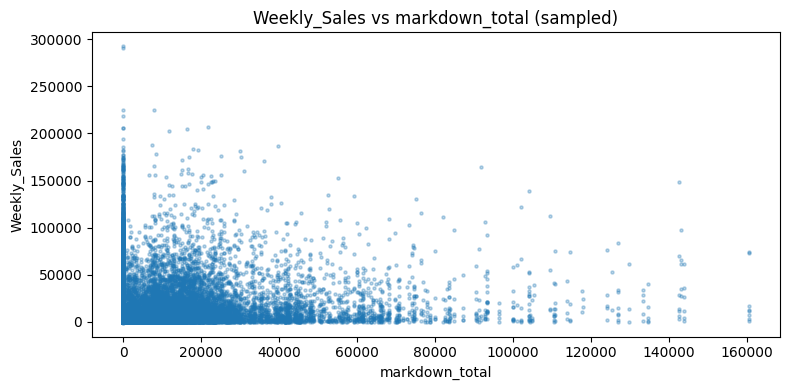

In [92]:
# Sales vs markdown_total (quick relationship check)
sample = tmp.sample(n=min(30000, len(tmp)), random_state=42)

plt.figure(figsize=(8, 4))
plt.scatter(sample["markdown_total"], sample["Weekly_Sales"], s=5, alpha=0.3)
plt.title("Weekly_Sales vs markdown_total (sampled)")
plt.xlabel("markdown_total")
plt.ylabel("Weekly_Sales")
plt.tight_layout()
plt.show()


**Insight of Weekly Sales vs Total Markdown**

1. No clear linear relationship between markdown size and sales volume. The scatter shows a wide dispersion with no strong upward trend. Increasing total markdown does not consistently translate into higher weekly sales.

2. High sales frequently occur at low or zero markdown. Many of the highest sales points sit near the markdown_total ≈ 0 region. This suggests demand is often driven by baseline factors (seasonality, holidays, store/dept strength), not discount magnitude.

3. Large markdowns exhibit diminishing returns. At higher markdown_total values, sales remain scattered and often low. This indicates that aggressive discounting does not guarantee demand uplift and may reflect reactive markdowns (e.g., clearing slow-moving inventory).

4. Markdown is more correlated with demand uncertainty than demand strength. The wide vertical spread at almost all markdown levels suggests markdowns respond to heterogeneous conditions, not a uniform demand response.

5. Modeling implication: Markdown_total should not be treated as a simple monotonic driver. Non-linear effects, thresholds, and interactions (markdown × department, markdown × season) are likely more informative than raw magnitude.

### 4.5 Store Level Heterogeneity

In this section, we explore store-level heterogeneity: how sales differ across stores due to store Type and Size, and how “risky” each store is based on demand volatility. This matters because forecasting and inventory decisions are rarely one-size-fits-all—some stores consistently sell more, while others fluctuate heavily and need larger safety buffers.

#### Average Weekly Sales by Store Type

In [93]:
# Statistical summary
type_summary = (
    retail_df.groupby("Type")["Weekly_Sales"]
    .agg(count="count", mean="mean", median="median", std="std")
    .sort_values("mean", ascending=False)
)

type_summary

,count,mean,median,std
Type,,,,
A,215478,20099.568043,10105.17,26423.457227
B,163495,12237.075977,6187.87,17203.668989
C,42597,9519.532538,1149.67,15985.351612


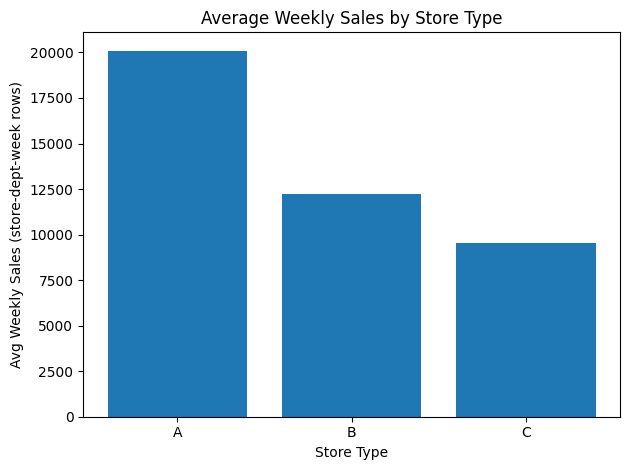

In [94]:
# Visualization
plt.figure()
plt.bar(type_summary.index.astype(str), type_summary["mean"])
plt.title("Average Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Avg Weekly Sales (store-dept-week rows)")
plt.tight_layout()
plt.show()

**Inisght of Store Types**

Store Type shows a clear structural difference in demand level.
Type A stores consistently generate the highest average weekly sales, followed by Type B, while Type C operates at a significantly lower demand scale.

This pattern suggests that store type is not merely a categorical label, but a proxy for underlying business characteristics such as footprint, assortment breadth, customer traffic, and regional importance. The gap between mean and median sales—especially for Type A—also indicates higher variability and the presence of high-performing weeks or departments.

Business implication: Store Type is a strong candidate feature for demand forecasting, capacity planning, and differentiated inventory policies.

#### Average Weekly Sales by Store Size (Binning)

In [95]:
# Bin store Size into quantiles (equal-frequency bins)
store_size_bins = retail_df[["Store", "Size"]].drop_duplicates()

store_size_bins["size_bin"] = pd.qcut(
    store_size_bins["Size"],
    q=5,
    duplicates="drop"
)

# Map size_bin back to all rows via Store
tmp_size = retail_df.merge(store_size_bins[["Store", "size_bin"]], on="Store", how="left")

sizebin_summary = (
    tmp_size.groupby("size_bin")["Weekly_Sales"]
    .agg(count="count", mean="mean", median="median", std="std")
    .sort_index()
)

sizebin_summary

,count,mean,median,std
size_bin,,,,
"(34874.999, 42602.8]",66185,8104.880310,1850.640,14352.246317
"(42602.8, 119022.6]",84600,11943.795985,6282.600,15790.868207
"(119022.6, 153539.0]",88114,14932.124978,7596.400,20727.868807
"(153539.0, 203154.0]",90793,19272.592165,9847.070,25152.258151
"(203154.0, 219622.0]",91878,23126.391767,12411.655,28792.108106


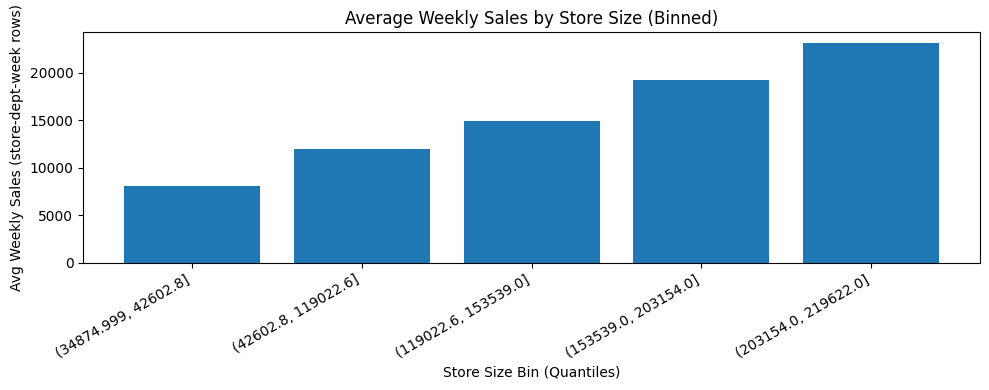

In [96]:
# Visualization
plt.figure(figsize=(10, 4))
plt.bar(sizebin_summary.index.astype(str), sizebin_summary["mean"])
plt.title("Average Weekly Sales by Store Size (Binned)")
plt.xlabel("Store Size Bin (Quantiles)")
plt.ylabel("Avg Weekly Sales (store-dept-week rows)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

**Insight of Store Siz**

When stores are grouped by size using equal-frequency bins, average weekly sales increase monotonically across size bins. Larger stores consistently outperform smaller ones, both in mean and median sales.

This confirms that store size has a strong and stable relationship with demand scale. The quantile-based binning also helps reduce noise from extreme size values, allowing clearer pattern extraction compared to raw size.

Business implication: Store size should be included in models either as a continuous feature or as a binned segment, especially for cross-store generalization and demand normalization.

#### Store Demand Volatolity

In [97]:
# Store-level volatility
store_stats = (
    retail_df.groupby("Store")["Weekly_Sales"]
    .agg(mean="mean", std="std", count="count")
)

# Coefficient of Variation (CV) = std / mean
store_stats["cv"] = store_stats["std"] / store_stats["mean"].replace(0, pd.NA)

store_stats.sort_values("cv", ascending=False).head(10)

,mean,std,count,cv
Store,,,,
3,6373.033983,14251.034807,9036,2.236146
44,6038.929814,10609.468795,7169,1.756846
38,7492.478460,12733.356273,7362,1.699485
30,8764.237719,14364.314622,7156,1.638969
5,5053.415813,8068.221050,8999,1.596588
42,11443.370118,18258.531574,6953,1.595555
37,10297.355026,16295.492638,7206,1.582493
33,5728.414053,8973.688840,6487,1.566522
43,13415.114118,20810.915093,6751,1.551304


In [98]:
# Filter out stores with non-positive mean to avoid CV blow-up
store_stats_cv_valid = store_stats[store_stats["mean"] > 0].copy()

top_volatile = store_stats_cv_valid.sort_values("cv", ascending=False).head(10)
top_stable = store_stats_cv_valid.sort_values("cv", ascending=True).head(10)

display(top_volatile)
display(top_stable)

,mean,std,count,cv
Store,,,,
3,6373.033983,14251.034807,9036,2.236146
44,6038.929814,10609.468795,7169,1.756846
38,7492.478460,12733.356273,7362,1.699485
30,8764.237719,14364.314622,7156,1.638969
5,5053.415813,8068.221050,8999,1.596588
42,11443.370118,18258.531574,6953,1.595555
37,10297.355026,16295.492638,7206,1.582493
33,5728.414053,8973.688840,6487,1.566522
43,13415.114118,20810.915093,6751,1.551304


,mean,std,count,cv
Store,,,,
23,19776.180881,20897.076552,10050,1.056679
11,19276.762751,20391.897907,10062,1.057849
6,21913.243624,23633.427075,10211,1.078500
8,13133.014768,15132.069598,9895,1.152216
21,11283.435496,13030.320859,9582,1.154819
18,15733.313136,18556.351564,9859,1.179431
4,29161.210415,34583.677814,10272,1.185948
34,13522.081671,16085.334848,10224,1.189561
19,20362.126734,24281.125431,10148,1.192465


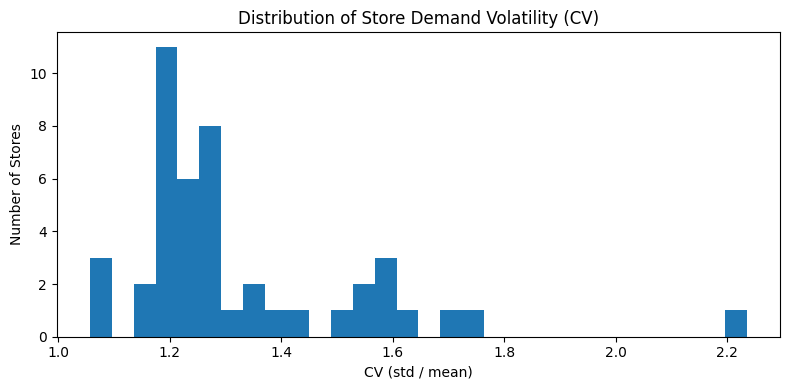

In [99]:
# Visualization
plt.figure(figsize=(8, 4))
plt.hist(store_stats_cv_valid["cv"].dropna(), bins=30)
plt.title("Distribution of Store Demand Volatility (CV)")
plt.xlabel("CV (std / mean)")
plt.ylabel("Number of Stores")
plt.tight_layout()
plt.show()

**Insight of Demand Volatility**

Coefficient of Variation (CV) reveals substantial heterogeneity in demand stability across stores. Some stores exhibit CV above 1.5, indicating highly volatile demand relative to their average sales, while others operate with much more predictable patterns.

High average sales do not necessarily imply stability—several high-mean stores still display elevated CV, highlighting operational risk that would be invisible if only mean demand were considered.

The ranking of most volatile and most stable stores highlights that demand risk is store-specific rather than purely size- or type-driven. Volatile stores may require closer monitoring, higher buffers, or alternative replenishment strategies, while stable stores are suitable for leaner inventory policies.

This segmentation provides a natural foundation for a risk dashboard or operational prioritization framework.

Business implication: CV is critical for safety stock design, service level differentiation, and risk-aware forecasting. Stores with high CV require more conservative buffers or specialized forecasting treatment.

### 4.6 Department-Level Behavior

In this section, we analyze department-level demand behavior. First, we profile how demand is distributed across departments (which departments consistently drive higher sales vs. smaller ones). Then, we compare seasonality patterns between selected departments to check whether departments follow similar time dynamics or behave differently. This matters because strong department heterogeneity often implies we need dept-aware features (or even segmented models) instead of relying on a single global model.

#### Department Demand Distribution

In [100]:
# Dept-level summary stats
dept_stats = (
    retail_df.groupby("Dept")["Weekly_Sales"]
      .agg(
          dept_weeks="count",
          mean_sales="mean",
          median_sales="median",
          std_sales="std",
          total_sales="sum"
      )
      .reset_index()
)

# Coefficient of Variation (CV) at dept-level (stability/volatility proxy)
dept_stats["cv_sales"] = dept_stats["std_sales"] / dept_stats["mean_sales"]

# Rank departments by average weekly sales
dept_stats_sorted = dept_stats.sort_values("mean_sales", ascending=False)

top_n = 15
bottom_n = 15

top_depts = dept_stats_sorted.head(top_n)
bottom_depts = dept_stats_sorted.tail(bottom_n).sort_values("mean_sales", ascending=True)

display(dept_stats_sorted.head(10))
display(dept_stats_sorted.tail(10))

,Dept,dept_weeks,mean_sales,median_sales,std_sales,total_sales,cv_sales
73,92,6435,75204.870531,61816.77,49413.732570,4.839433e+08,0.657055
76,95,6435,69824.423080,60774.39,38200.536452,4.493202e+08,0.547094
36,38,6435,61090.619568,57336.65,23966.913901,3.931181e+08,0.392317
60,72,6046,50566.515417,44312.36,44710.982652,3.057252e+08,0.884201
57,65,143,45441.706224,47281.16,7086.889697,6.498164e+06,0.155956
71,90,6435,45232.084488,40535.79,32462.020077,2.910685e+08,0.717677
38,40,6435,44900.702727,42717.87,21903.876911,2.889360e+08,0.487829
1,2,6435,43607.020113,41412.61,25176.756920,2.806112e+08,0.577356
72,91,6435,33687.910758,31033.63,26247.462296,2.167817e+08,0.779136
75,94,5685,33405.883963,35003.70,25405.560190,1.899125e+08,0.760512


,Dept,dept_weeks,mean_sales,median_sales,std_sales,total_sales,cv_sales
80,99,862,415.487065,59.920,1099.725277,358149.85,2.646834
56,60,5772,347.370229,279.000,283.900968,2005020.96,0.817286
62,77,150,328.961800,198.000,343.471023,49344.27,1.044106
51,54,4767,108.305985,58.920,145.515905,516294.63,1.343563
43,45,1936,23.211586,14.940,24.960376,44937.63,1.075341
49,51,1394,21.931729,11.000,29.146545,30572.83,1.328967
37,39,16,11.123750,10.430,9.511561,177.98,0.855068
63,78,235,7.296638,9.880,10.400545,1714.71,1.425389
41,43,12,1.193333,0.750,1.027745,14.32,0.861239
45,47,646,-7.682554,17.985,307.882645,-4962.93,-40.075558


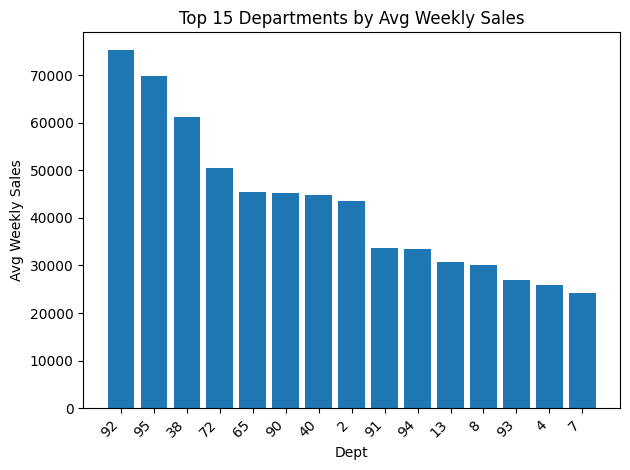

In [101]:
# Visualization of top departments by average weekly sales
plt.figure()
plt.bar(top_depts["Dept"].astype(str), top_depts["mean_sales"])
plt.xticks(rotation=45, ha="right")
plt.title(f"Top {top_n} Departments by Avg Weekly Sales")
plt.xlabel("Dept")
plt.ylabel("Avg Weekly Sales")
plt.tight_layout()
plt.show()

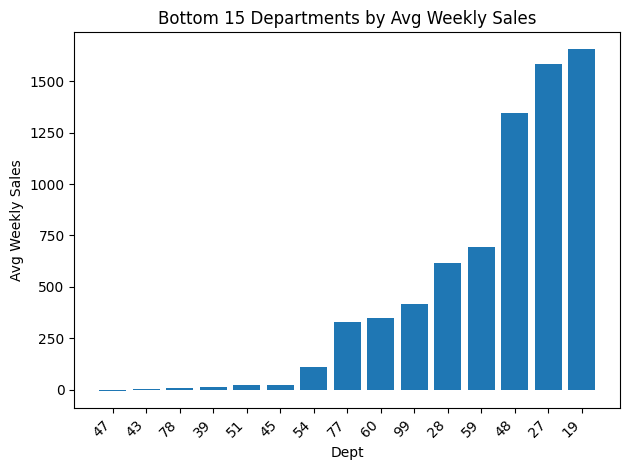

In [102]:
# Visualization of bottom departments by average weekly sales
plt.figure()
plt.bar(bottom_depts["Dept"].astype(str), bottom_depts["mean_sales"])
plt.xticks(rotation=45, ha="right")
plt.title(f"Bottom {bottom_n} Departments by Avg Weekly Sales")
plt.xlabel("Dept")
plt.ylabel("Avg Weekly Sales")
plt.tight_layout()
plt.show()

**Insight of Department Demand Distribution**

Demand is highly concentrated across a small subset of departments. The top departments (e.g. Dept 92, 95, and 38) consistently generate significantly higher average weekly sales, indicating that overall revenue performance is disproportionately driven by a limited number of categories.

However, high average sales do not guarantee stability. Several high-demand departments still exhibit moderate to high variability, which implies operational risk even in revenue-critical categories. On the other end of the spectrum, low-demand departments contribute marginally to total sales but often display extreme volatility relative to their scale, making them sensitive to noise, promotions, or one-off events.

This distribution highlights that department size alone is not sufficient to guide forecasting or inventory decisions. Both contribution (mean sales) and stability (CV) must be considered when prioritizing modeling effort, inventory buffers, and monitoring intensity.

#### Department Seasonality Difference

Selected depts: [92, 95, 38, 47]


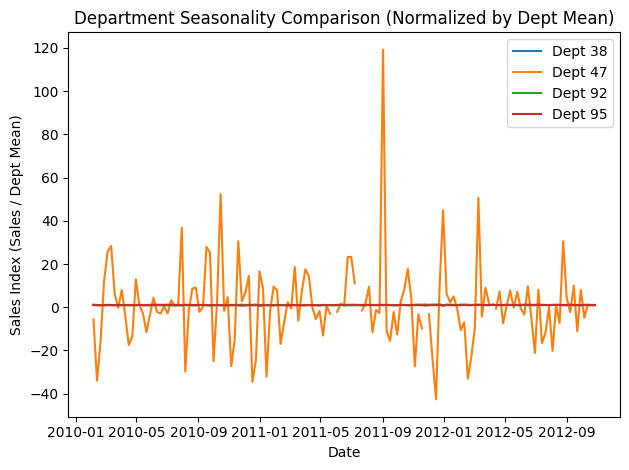

In [103]:
# Pick departments to compare
# Strategy: top 3 by mean sales + 1 bottom dept (for contrast)
top_k = 3

selected_top = dept_stats_sorted.head(top_k)["Dept"].tolist()
selected_bottom = dept_stats_sorted.tail(1)["Dept"].tolist()

selected_depts = selected_top + selected_bottom
print("Selected depts:", selected_depts)

# Aggregate weekly sales by Date & Dept (sum across stores)
dept_weekly = (
    retail_df[retail_df["Dept"].isin(selected_depts)]
      .groupby(["Date", "Dept"])["Weekly_Sales"]
      .sum()
      .reset_index()
)

# Pivot to wide format: each dept becomes a column
dept_pivot = dept_weekly.pivot(index="Date", columns="Dept", values="Weekly_Sales").sort_index()

# Normalize each dept series by its own mean to compare patterns (shape)
dept_norm = dept_pivot / dept_pivot.mean(axis=0)

# Plot normalized seasonality patterns
plt.figure()
for dept_id in dept_norm.columns:
    plt.plot(dept_norm.index, dept_norm[dept_id], label=f"Dept {dept_id}")

plt.title("Department Seasonality Comparison (Normalized by Dept Mean)")
plt.xlabel("Date")
plt.ylabel("Sales Index (Sales / Dept Mean)")
plt.legend()
plt.tight_layout()
plt.show()


**Inisght of Department Seasonality Differences**

Seasonality patterns differ materially across departments. High-volume departments such as Dept 92, 95, and 38 display relatively stable and smooth demand trajectories over time, suggesting more predictable underlying consumption behavior.

In contrast, low-volume departments (e.g. Dept 47) exhibit highly erratic and spike-driven patterns, with sharp deviations that are not aligned with the broader demand cycle. These fluctuations are unlikely to be captured well by a single global trend and are more indicative of event-driven or promotion-sensitive demand.

This divergence indicates that departments do not share a common temporal structure. As a result, a single global forecasting model without department context would systematically overfit stable departments and underperform on volatile ones. Department-aware features, segmentation, or differentiated forecasting treatment are therefore necessary to balance accuracy and robustness across the portfolio.

**Modeling and Business Implication**

The analysis clearly indicates that one-size-fits-all forecasting is insufficient. Department-level heterogeneity affects both demand magnitude and temporal behavior. Incorporating department-aware features, interaction terms, or segmented evaluation strategies is essential to ensure that the model remains accurate, stable, and operationally useful across different demand profiles.

### 4.7 Store-Dept Interaction

In this section, we analyze Store × Department interactions to see whether demand behavior is consistent across stores for the same department, or whether each store-dept pair has its own “local dynamics.” We will summarize sales volume and volatility (CV) at the store-dept level, then sample a few representative pairs (stable vs volatile, high vs low volume) and plot weekly sales over time. This matters because forecasting accuracy often depends on local signals—lag-based and rolling features are typically necessary when demand patterns vary widely across store-dept combinations, even if we use a global model.

#### Build Store x Dept Summary and Pick Representative Pairs

In [104]:
# Choose dataframe safely
data = retail_df if "retail_df" in globals() else df

# Store-Dept summary: volume & volatility
pair_stats = (
    data.groupby(["Store", "Dept"])["Weekly_Sales"]
        .agg(
            n_weeks="count",
            mean_sales="mean",
            median_sales="median",
            std_sales="std",
            total_sales="sum"
        )
        .reset_index()
)

# Avoid division issues (mean=0)
pair_stats["cv_sales"] = pair_stats["std_sales"] / pair_stats["mean_sales"].replace(0, np.nan)

# Volume buckets (high/low) and stability buckets (stable/volatile) using quantiles
vol_thresh = pair_stats["mean_sales"].quantile(0.75)      # top 25% = high volume
stab_thresh = pair_stats["cv_sales"].quantile(0.75)       # top 25% CV = volatile

pair_stats["volume_bucket"] = np.where(pair_stats["mean_sales"] >= vol_thresh, "High volume", "Low/Medium volume")
pair_stats["stability_bucket"] = np.where(pair_stats["cv_sales"] >= stab_thresh, "Volatile", "Stable/Moderate")

# Build a 4-quadrant label for sampling
pair_stats["quadrant"] = pair_stats["volume_bucket"] + " × " + pair_stats["stability_bucket"]

# Sample 1 representative from each quadrant:
# pick the most "typical" inside quadrant (closest to quadrant median mean & CV)
samples = []
for q in pair_stats["quadrant"].unique():
    sub = pair_stats[pair_stats["quadrant"] == q].copy()
    if len(sub) == 0:
        continue
    target_mean = sub["mean_sales"].median()
    target_cv = sub["cv_sales"].median()
    sub["dist"] = (sub["mean_sales"] - target_mean).abs() + (sub["cv_sales"] - target_cv).abs()
    samples.append(sub.sort_values("dist").head(1))

sample_pairs = pd.concat(samples, ignore_index=True).sort_values(["volume_bucket", "stability_bucket"])
display(sample_pairs[["Store", "Dept", "n_weeks", "mean_sales", "std_sales", "cv_sales", "quadrant"]])

# Quick distribution view (optional but useful)
quad_counts = pair_stats["quadrant"].value_counts()
display(quad_counts)

,Store,Dept,n_weeks,mean_sales,std_sales,cv_sales,quadrant
0,2,96,143,34319.063846,4886.987587,0.142399,High volume × Stable/Moderate
2,19,16,143,28023.600070,25376.684444,0.905547,High volume × Volatile
3,23,31,143,4749.540629,1801.795198,0.379362,Low/Medium volume × Stable/Moderate
1,36,5,113,314.753982,334.021394,1.061214,Low/Medium volume × Volatile


quadrant
Low/Medium volume × Stable/Moderate    1746
High volume × Stable/Moderate           762
Low/Medium volume × Volatile            752
High volume × Volatile                   71
Name: count, dtype: int64

#### Visualization of Weekly Sales Over Time for Selected Pairs

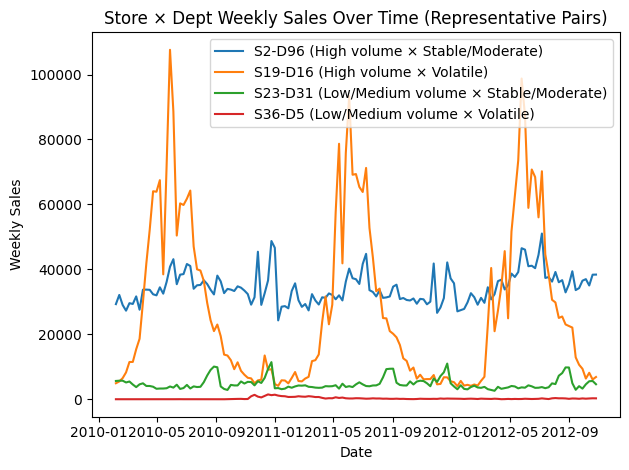

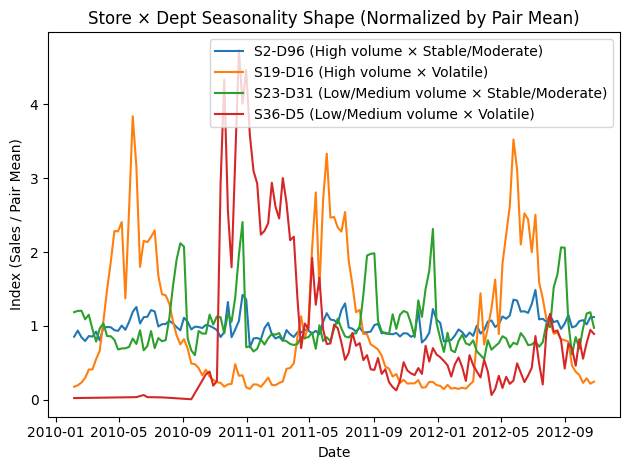

In [105]:
# Build time series for selected pairs
pairs_to_plot = sample_pairs[["Store", "Dept", "quadrant"]].to_dict(orient="records")

plt.figure()
for item in pairs_to_plot:
    s = item["Store"]
    d = item["Dept"]
    label = f"S{s}-D{d} ({item['quadrant']})"

    ts = (
        data[(data["Store"] == s) & (data["Dept"] == d)]
        .groupby("Date")["Weekly_Sales"]
        .sum()
        .sort_index()
    )

    plt.plot(ts.index, ts.values, label=label)

plt.title("Store × Dept Weekly Sales Over Time (Representative Pairs)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()

# Normalized view (compare shape, not scale)
plt.figure()
for item in pairs_to_plot:
    s = item["Store"]
    d = item["Dept"]
    label = f"S{s}-D{d} ({item['quadrant']})"

    ts = (
        data[(data["Store"] == s) & (data["Dept"] == d)]
        .groupby("Date")["Weekly_Sales"]
        .sum()
        .sort_index()
    )

    ts_norm = ts / (ts.mean() if ts.mean() != 0 else 1)
    plt.plot(ts_norm.index, ts_norm.values, label=label)

plt.title("Store × Dept Seasonality Shape (Normalized by Pair Mean)")
plt.xlabel("Date")
plt.ylabel("Index (Sales / Pair Mean)")
plt.legend()
plt.tight_layout()
plt.show()

**Inisght of Store-Dept Interaction**

Time series visualization of representative Store × Dept pairs highlights sharp contrasts in demand dynamics. High-volume and stable pairs exhibit relatively smooth trajectories with moderate fluctuations, making them suitable for baseline forecasting approaches. In contrast, high-volume but volatile pairs show pronounced spikes and abrupt drops, suggesting strong sensitivity to local drivers such as promotions, calendar effects, or store-specific conditions.

Low-volume pairs, especially volatile ones, display irregular and noisy patterns where demand is event-driven rather than trend-driven. These behaviors would be poorly captured by a global trend alone and require localized context to avoid large forecast errors.

After normalizing sales by each pair’s mean, the seasonality shapes reveal that Store × Dept pairs do not share a common temporal structure. Stable pairs tend to follow smooth and repeatable seasonal patterns, while volatile pairs display asymmetric, spike-driven shapes that differ not only in magnitude but also in timing.

This indicates that seasonality is not purely department-wide or store-wide, but interaction-specific. A single global seasonal component would therefore fail to represent the true demand rhythm for many local combinations.

### 4.8 Stability Segmentation (Risk Bucketing)

In this section, we convert volatility insights into a decision-ready segmentation by bucketing Store × Dept pairs into stability tiers (Stable, Semi-Volatile, Highly Volatile) using the coefficient of variation (CV). The goal is not to “label data for fun,” but to create an operational view of demand risk that can support differentiated policies—such as safety stock levels, monitoring intensity, and service level targets. This also helps modeling by clarifying where simple patterns are sufficient versus where local signals and more conservative forecasting are needed.

In [106]:
# Choose dataframe safely
data = retail_df if "retail_df" in globals() else df

# Build Store × Dept risk table using CV (volatility proxy)
risk_table = (
    data.groupby(["Store", "Dept"])["Weekly_Sales"]
        .agg(
            n_weeks="count",
            mean_sales="mean",
            std_sales="std",
            total_sales="sum"
        )
        .reset_index()
)

# CV = std / mean (avoid divide-by-zero)
risk_table["cv_sales"] = risk_table["std_sales"] / risk_table["mean_sales"].replace(0, np.nan)

# Optional guard: drop pairs with too few observations (to avoid noisy CV)
min_weeks = 12
risk_table_filtered = risk_table[risk_table["n_weeks"] >= min_weeks].copy()

# Define stability buckets (3 tiers) using quantiles
#   - Stable: CV <= q33
#   - Semi-Volatile: q33 < CV <= q66
#   - Highly Volatile: CV > q66
q33, q66 = risk_table_filtered["cv_sales"].quantile([0.33, 0.66])

def bucket_cv(cv, q33, q66):
    if pd.isna(cv):
        return "Unknown"
    if cv <= q33:
        return "Stable"
    elif cv <= q66:
        return "Semi-Volatile"
    else:
        return "Highly Volatile"

risk_table_filtered["stability_tier"] = risk_table_filtered["cv_sales"].apply(bucket_cv, args=(q33, q66))

# Summaries: count and sales contribution by tier
tier_summary = (
    risk_table_filtered.groupby("stability_tier")
        .agg(
            pair_count=("stability_tier", "count"),
            avg_cv=("cv_sales", "mean"),
            avg_mean_sales=("mean_sales", "mean"),
            total_sales=("total_sales", "sum")
        )
        .reset_index()
)

tier_summary["sales_share"] = tier_summary["total_sales"] / tier_summary["total_sales"].sum()

display(tier_summary.sort_values("sales_share", ascending=False))

,stability_tier,pair_count,avg_cv,avg_mean_sales,total_sales,sales_share
2,Stable,1039,-0.125558,28778.144238,4.275156e+09,0.634564
1,Semi-Volatile,1038,0.310213,9156.954724,1.358993e+09,0.201716
0,Highly Volatile,1070,1.322203,7285.519366,1.103001e+09,0.163719


Sales concentration is clearly skewed to “Stable” pairs. Even though the number of pairs across tiers is roughly similar, Stable pairs contribute ~63.5% of total sales, while Semi-Volatile contributes ~20.2% and Highly Volatile ~16.4%.In practice, most revenue comes from demand streams that are easier to plan.

Volatility tiers are not “just labels”—they imply different operating policies.
- Stable: suitable for lighter monitoring, tighter forecasting error bands, and more aggressive service level targets.
- Semi-Volatile: needs balanced buffers and more careful review.
- Highly Volatile: requires conservative planning, higher safety stock buffers (or alternative replenishment logic), and exception-based monitoring.

Modeling implication: a single global model will struggle to fit all tiers equally well. Highly volatile pairs often behave like “local regimes” (promotions, shocks, store-specific events), so they typically benefit more from lag/rolling features + local signals than from purely global patterns.

Important data check (tbe table shows a red flag):
- The avg_cv for Stable is negative (-0.125) — CV should not be negative if mean sales are positive. This usually indicates some Store×Dept pairs have negative mean_sales (returns, cancellations, data quirks). For cleaner segmentation, we will consider using cv = std / abs(mean) and/or filter out pairs where mean_sales <= 0.

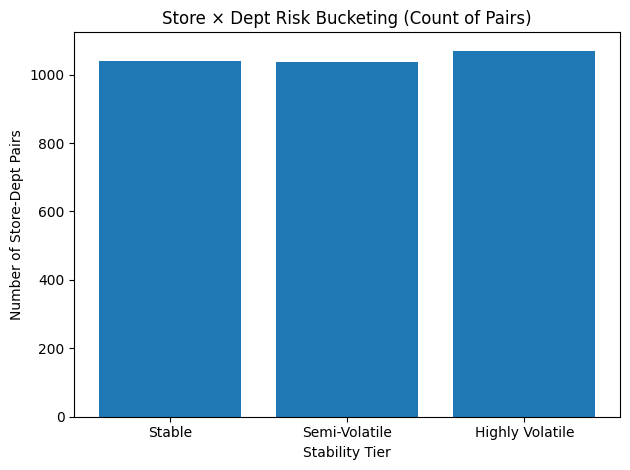

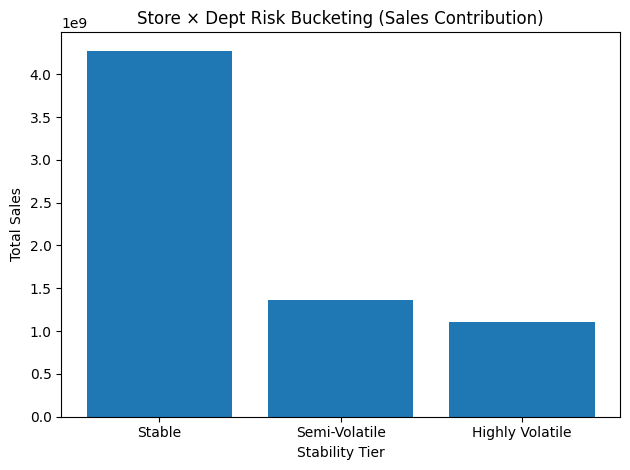

In [107]:
# Visualization

# Count of pairs by tier
plt.figure()
counts = risk_table_filtered["stability_tier"].value_counts().reindex(["Stable", "Semi-Volatile", "Highly Volatile"])
plt.bar(counts.index, counts.values)
plt.title("Store × Dept Risk Bucketing (Count of Pairs)")
plt.xlabel("Stability Tier")
plt.ylabel("Number of Store-Dept Pairs")
plt.tight_layout()
plt.show()

# Sales contribution by tier
plt.figure()
tier_sales = tier_summary.set_index("stability_tier").reindex(["Stable", "Semi-Volatile", "Highly Volatile"])["total_sales"]
plt.bar(tier_sales.index, tier_sales.values)
plt.title("Store × Dept Risk Bucketing (Sales Contribution)")
plt.xlabel("Stability Tier")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Inisight of Count of Pairs Plot**

The number of Store–Department pairs is relatively balanced across the three stability tiers: Stable, Semi-Volatile, and Highly Volatile.
This indicates that demand risk is structurally distributed, not concentrated in a small subset of products or locations.

From an operational perspective, volatility is not an exception—it is a system-wide characteristic. This means the business cannot rely on a single forecasting or inventory strategy across all Store–Dept combinations. A differentiated approach is required, where stability characteristics guide planning intensity and policy decisions.

**Inisght of Sales Contribution Plot**

Despite representing only about one-third of Store–Dept pairs, the Stable tier contributes more than 50% of total sales. This confirms that the bulk of revenue comes from demand patterns that are relatively predictable and consistent over time.

On the other hand, Semi-Volatile and Highly Volatile tiers contribute a much smaller share of total sales, despite having a similar number of Store–Dept pairs. This asymmetry highlights a critical insight: volatility is disproportionately concentrated in lower-volume segments, while revenue concentration lies in stable demand streams.

**Business Intepretation**

This segmentation clearly separates where efficiency matters most from where risk control is critical:
- Stable segments are ideal candidates for:
    - simpler forecasting models,
    - lean safety stock,
    - high service-level consistency.

- Volatile segments require:
    - tighter monitoring,
    - more conservative buffers,
    - stronger reliance on local and lag-based signals.

This justifies why a global forecasting model alone is insufficient, and why local behavior and segmentation-aware policies are essential.

In [108]:
# Find "high-impact risk" pairs
# High volume AND Highly Volatile = priority monitoring / conservative planning
vol_thresh = risk_table_filtered["mean_sales"].quantile(0.75)  # top 25% mean = high volume

high_impact_risk = risk_table_filtered[
    (risk_table_filtered["stability_tier"] == "Highly Volatile") &
    (risk_table_filtered["mean_sales"] >= vol_thresh)
].sort_values(["mean_sales", "cv_sales"], ascending=False)

display(high_impact_risk.head(15)[["Store", "Dept", "n_weeks", "mean_sales", "std_sales", "cv_sales", "total_sales", "stability_tier"]])

,Store,Dept,n_weeks,mean_sales,std_sales,cv_sales,total_sales,stability_tier
736,10,72,143,142733.752168,74674.505691,0.523173,20410926.56,Highly Volatile
284,4,72,143,101244.450839,47323.714827,0.467420,14477956.47,Highly Volatile
1044,14,72,143,94140.832867,52070.686993,0.553115,13462139.10,Highly Volatile
1510,20,72,143,91989.863217,51440.261925,0.559195,13154550.44,Highly Volatile
2635,35,72,143,88331.808881,71265.927075,0.806798,12631448.67,Highly Volatile
1740,23,72,143,76844.022727,42662.506657,0.555183,10988695.25,Highly Volatile
134,2,72,143,72929.496643,34440.916182,0.472249,10428918.02,Highly Volatile
1432,19,72,143,72434.486364,38577.429852,0.532584,10358131.55,Highly Volatile
2048,27,72,143,68527.765944,44791.304378,0.653623,9799470.53,Highly Volatile
1663,22,72,143,66645.669021,43296.446779,0.649651,9530330.67,Highly Volatile


**Insight of table**

Several high-impact pairs show:
- consistently high mean weekly sales,
- large standard deviation relative to the mean (high CV),
- long observation history (n_weeks ≈ full horizon),

This confirms that volatility is structural, not caused by data sparsity or short history. These are genuinely unstable demand patterns operating at meaningful scale.

**Business inisght**

This analysis isolates a small but critical subset of Store–Department pairs that combine high average sales volume with high demand volatility.
Although these pairs are not dominant in count, they represent outsized operational risk due to the simultaneous presence of revenue exposure and unpredictability.

These are the combinations where forecasting errors are most costly:
- Under-forecasting leads to lost sales and service-level breaches.
- Over-forecasting results in excess inventory and working capital lock-in.

From a business standpoint, these pairs should be treated as priority risk assets, not as standard demand streams. They warrant closer monitoring, more conservative planning assumptions, and stronger reliance on local signals rather than global averages.

**Decision-Oriented intepretation**

This segment is the strongest justification for:
- differentiated safety stock policies,
- exception-based monitoring dashboards,
- more conservative forecasting strategies (e.g. higher buffers, stronger lag features).

It also explains why “average behavior” models tend to fail operationally: the most business-critical errors occur exactly in this segment.

**Bridge to Modeling**

These high-impact volatile pairs motivate the use of lag-based features, local signals, and conservative forecasting strategies, as global patterns alone are insufficient to manage risk at this scale.

### 4.9 Save Dataset

At the end of the EDA phase, we export the cleaned and validated dataset as a Parquet file. This file becomes the single source of truth for the next stage (Feature Engineering), ensuring that FE starts from an “EDA-approved” dataset with consistent schema and data types. Using Parquet also makes loading faster and more reliable than CSV, especially when we iterate on features and modeling multiple times.

In [109]:
# Create folder directory so save file
os.makedirs("data_clean", exist_ok=True)

# Save final EDA-approved dataset to parquet
retail_df.to_parquet("data_clean/retaul_eda_final.parquet", index=False)